In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from itertools import product, combinations

<IPython.core.display.Javascript object>


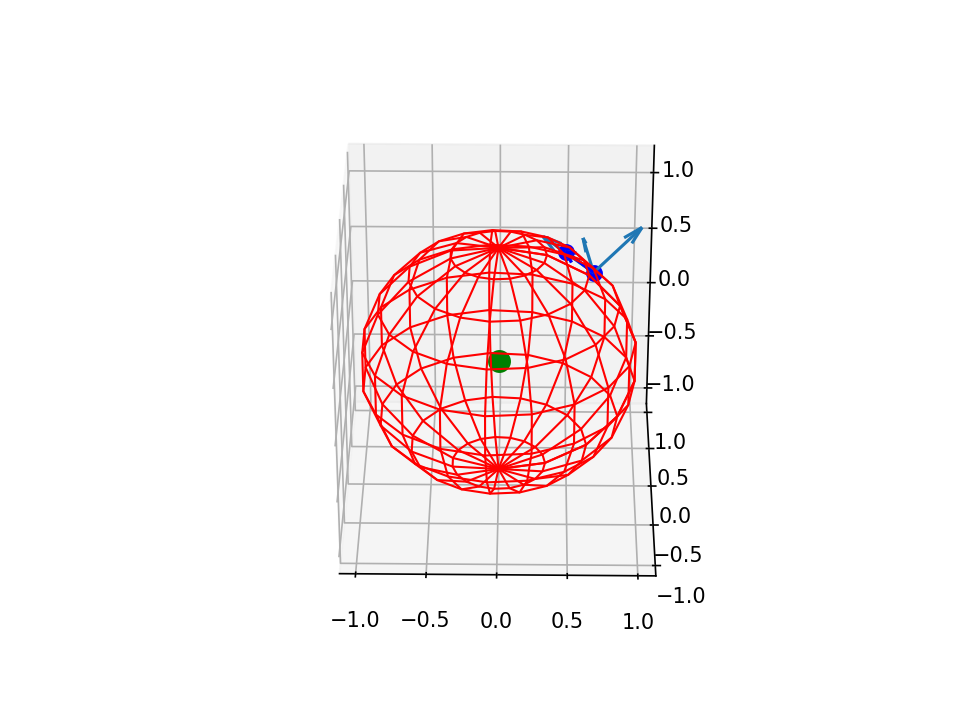

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

In [3]:
# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r", linewidths=1)

In [4]:
# draw a point
ax.scatter([0], [0], [0], color="g", s=100)

In [5]:
def geo_to_euclid(lat, long, rad):
    lat, long = np.radians(lat), np.radians(long)
    v = [np.cos(lat) * np.cos(long)
        ,np.cos(lat) * np.sin(long)
        ,np.sin(lat)]
    return np.multiply(v, rad)

In [6]:
def euclid_to_geo(v):
    x,y,z = v[0], v[1], v[2]
    lat = np.arctan(z/np.sqrt(x**2 + y**2))
    lat = np.degrees(lat)
    long = np.arctan2(y, x)
    long = np.degrees(long)
    rad = np.linalg.norm(v)
    return lat, long, rad

In [7]:
# computes the rotation matrix to align a with b
def rotation(a, b):
    # https://math.stackexchange.com/questions/180418/calculate-rotation-matrix-to-align-vector-a-to-vector-b-in-3d
    a = np.array(a)
    a = a / np.linalg.norm(a)
    b = np.array(b)
    b = b / np.linalg.norm(b)
    cross = np.cross(a, b)
    if not np.any(cross):
        # vectors are aligned
        if np.dot(a, b) > 0:
            return np.eye(3)
        else:
            return -np.eye(3)
    dot = np.dot(a,b)
    # G is a 2D rotation in the plane of a and b
    G = np.array([[dot, -np.linalg.norm(cross), 0],
         [np.linalg.norm(cross), dot, 0],
         [0, 0, 1]])
    # Fi is the inverse of the basis change matrix F
    v = b - dot * a
    Fi = np.array([a,
          v / np.linalg.norm(v),
          np.cross(b,a)])
    Fi = np.transpose(Fi)
    # U is the rotation matrix in the original basis
    U = Fi @ G @ np.linalg.inv(Fi)
    return U

In [8]:
a = np.array([1,1,1])
a = a / np.linalg.norm(a)
b = [1,0,0]
U = rotation(a,b)
b - U @ a

array([0.00000000e+00, 6.93889390e-17, 5.55111512e-17])

In [9]:
ground = geo_to_euclid(47, 8, 1)
x,y,z = ground
ax.scatter([x], [y], [z], color="blue", s=50)
x,y,z

(0.6753611989040085, 0.09491582661957716, 0.7313537016191705)

In [10]:
satellite = geo_to_euclid(65, -22, 1.2)
x,y,z = satellite
ax.scatter([x], [y], [z], color="blue", s=50)
x,y,z

(0.47021379471726854, -0.1899787048152452, 1.0875693444439798)

In [11]:
vec = np.subtract(satellite, ground)
ax.quiver(ground[0], ground[1], ground[2], vec[0], vec[1], vec[2])

<IPython.core.display.Javascript object>


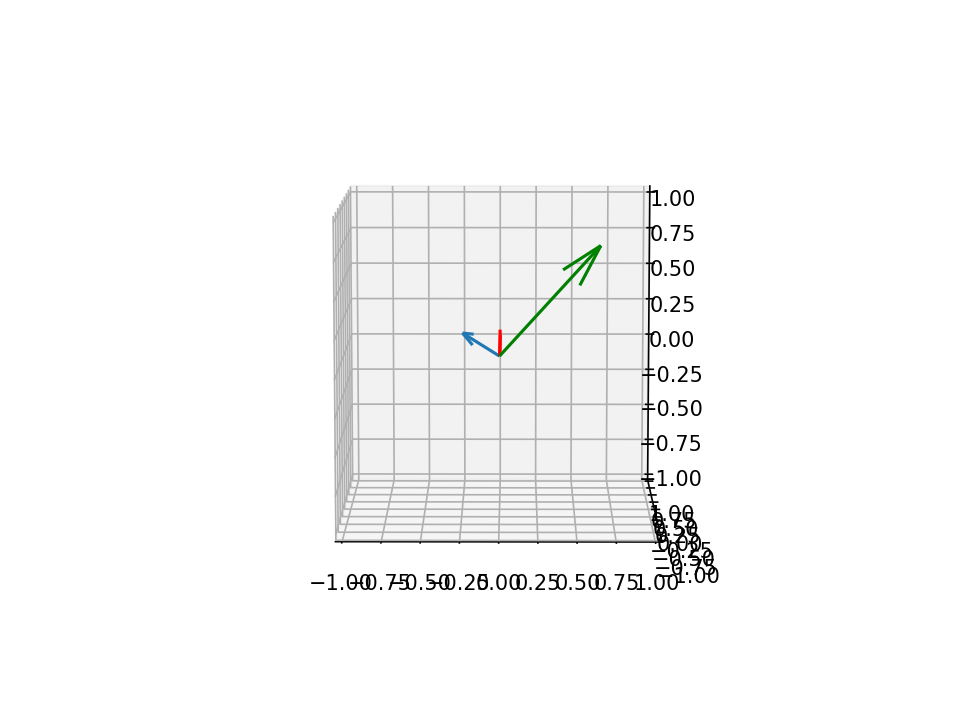

(-1, 1)

In [12]:
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
ax2.set_aspect("equal")
ax2.set_xlim3d(-1,1)
ax2.set_ylim3d(-1,1)
ax2.set_zlim3d(-1,1)

In [13]:
def quiver_from_ground(vec, **kwargs):
    ax.quiver(ground[0], ground[1], ground[2], vec[0], vec[1], vec[2], **kwargs)

In [32]:
def ground_basis(ground):
    y = np.array([0,0,1])
    north = y - ground * np.dot(y, ground)
    north = north / norm(north)
    east = np.cross(north, ground)
    east = east / norm(east)
    sky = ground / norm(ground)
    basis = np.array([east, north, sky])
    return basis
ground_basis(ground)

array([[-1.39173101e-01,  9.90268069e-01, -1.38777878e-17],
       [-7.24236218e-01, -1.01784763e-01,  6.81998360e-01],
       [ 6.75361199e-01,  9.49158266e-02,  7.31353702e-01]])

In [15]:
for v in basis:
    quiver_from_ground(v / 2)

In [16]:
Qi = np.transpose(np.linalg.inv(basis))
vec_t = Qi @ vec
ax2.quiver(0,0,0, vec_t[0], vec_t[1], vec_t[2])

In [33]:
euclid_to_geo(vec_t)

(10.941518252366489, 121.09022385901295, 0.500139916102601)

In [17]:
ax2.quiver(0,0,0, 0, 1, 0, color="red")

In [18]:
quiver_from_ground(vec, color="blue")
vec

array([-0.2051474 , -0.28489453,  0.35621564])

In [19]:
ax2.quiver(0,0,0, ground[0], ground[1], ground[2], color="green")
ground

array([0.6753612 , 0.09491583, 0.7313537 ])

In [20]:
rot = rotation(ground, [0,0,1])
rot

array([[ 0.73655715, -0.03702448, -0.6753612 ],
       [-0.03702448,  0.99479655, -0.09491583],
       [ 0.6753612 ,  0.09491583,  0.7313537 ]])

In [21]:
rot @ ground

array([1.11022302e-16, 1.38777878e-17, 1.00000000e+00])

In [22]:
sat_rotated = rot @ vec
# ax2.quiver(0,0,0, sat_rotated[0], sat_rotated[1], sat_rotated[2], color="blue")
sat_rotated

array([-0.38112894, -0.30962712,  0.09493003])

In [23]:
U = rotation([0,1,0], [0,0,1])
U

array([[ 1.,  0.,  0.],
       [ 0.,  0., -1.],
       [ 0.,  1.,  0.]])

In [24]:
np.linalg.norm(U, ord=2)

1.0

In [25]:
U @ [0,1,0]

array([0., 0., 1.])

In [26]:
a = np.array([1,0,0])
b = np.array([0,1,0])
a = a / np.linalg.norm(a)
b = b / np.linalg.norm(b)
cross = np.cross(a, b)
dot = np.dot(a,b)
# G is a 2D rotation in the plane of a and b
G = np.array([[dot, -np.linalg.norm(cross), 0],
     [np.linalg.norm(cross), dot, 0],
     [0, 0, 1]])
G

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [27]:
# Fi is the inverse of the basis change matrix F
v = b - dot * a
v

Fi = np.array([a,
      v / np.linalg.norm(v),
      np.cross(b,a)])
Fi

U = Fi @ G @ np.linalg.inv(Fi)
U

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [28]:
U @ a

array([0., 1., 0.])

In [29]:
np.linalg.norm(a)

1.0

In [30]:
A = np.array([[1,0],[0,1]])
B = np.array([[0,1],[1,0]])
np.matmul(B, np.array([1,2]))

array([2, 1])

In [31]:
vec_geo = euclid_to_geo(vec)
vec_geo

(45.41680675818169, -125.7569787256878, 0.500139916102601)